<a href="https://colab.research.google.com/github/Aftabgazali/Rock-Paper-Scissor-Classification-Using-CNN/blob/main/Rock_Paper_Scissor_Classification_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -q tensorflow tensorflow-datasets

In [2]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras

In [ ]:
tfds.list_builders()

## Get Some Information on the Data

In [4]:
builder=tfds.builder('rock_paper_scissors')
info=builder.info
info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    version=3.0.0,
    description='Images of hands playing rock, paper, scissor game.',
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    total_num_examples=2892,
    splits={
        'test': 372,
        'train': 2520,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
    redistribution_info=,
)

## Prepare the Data

In [51]:
ds_train=tfds.load('rock_paper_scissors',split='train')
ds_test=tfds.load('rock_paper_scissors',split='test')

## Printing some Examples

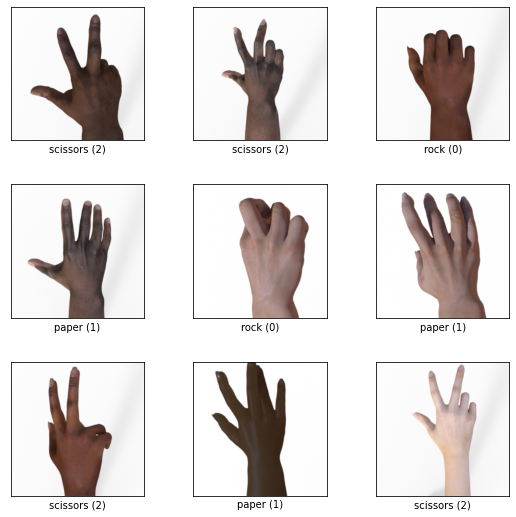

In [6]:
fig=tfds.show_examples(ds_train,info)

# Additional Data Preprocessing

In [7]:
import matplotlib.pyplot as plt

In [8]:
## To iterate over dataset

train_images=np.array([example['image'].numpy() for example in ds_train])

In [9]:
train_images.shape
# We have 2520 train images having size 300 300 and color 3

(2520, 300, 300, 3)

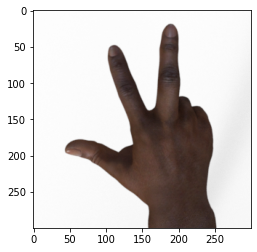

In [10]:
plt.imshow(train_images[0])

In [11]:
# To remove the color
train_images=np.array([example['image'].numpy()[:,:,0] for example in ds_train])
train_labels=np.array([example['label'].numpy() for example in ds_train])

test_images=np.array([example['image'].numpy()[:,:,0] for example in ds_test])
test_labels=np.array([example['label'].numpy() for example in ds_test])

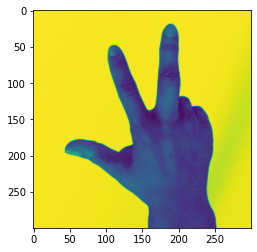

In [12]:
plt.imshow(train_images[0])

In [13]:
test_images.shape

(372, 300, 300)

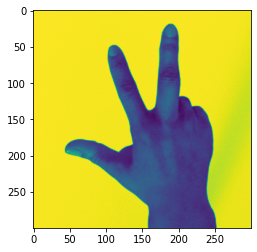

In [65]:
img=train_images[0].reshape(300,300)
plt.imshow(img)

In [66]:
train_labels[0]

2

In [14]:
train_images=train_images.reshape(2520,300,300,1)
test_images=test_images.reshape(372,300,300,1)

In [15]:
# To Convert the value between 0-1 we've to change its type to float

test_images=test_images.astype('float32')
train_images=train_images.astype('float32')

train_images/=255
test_images/=255

# Building CNN

In [16]:
models=keras.Sequential(
    [
  keras.layers.Conv2D(64,3,activation='relu',input_shape=(300,300,1)),
  keras.layers.Flatten(),
  keras.layers.Dense(3,activation='softmax')])

In [17]:
models.compile(optimizer='adam',loss=keras.losses.SparseCategoricalCrossentropy(),
               metrics=['accuracy'])

In [19]:
models.fit(train_images,train_labels,epochs=5,batch_size=32)

Epoch 1/5
79/79 [==============================] - 7s 83ms/step - loss: 0.3020 - accuracy: 0.9115
Epoch 2/5
79/79 [==============================] - 6s 80ms/step - loss: 0.0700 - accuracy: 0.9909
Epoch 3/5
79/79 [==============================] - 6s 80ms/step - loss: 0.0259 - accuracy: 0.9976
Epoch 4/5
79/79 [==============================] - 6s 80ms/step - loss: 0.1741 - accuracy: 0.9687
Epoch 5/5
79/79 [==============================] - 6s 80ms/step - loss: 0.0309 - accuracy: 0.9976


In [20]:
models.evaluate(test_images,test_labels)

12/12 [==============================] - 1s 55ms/step - loss: 0.9885 - accuracy: 0.5511


[0.9884573221206665, 0.551075279712677]

# Building A Better CNN 

In [39]:
models=keras.Sequential([
  keras.layers.AveragePooling2D(6,2,input_shape=(300,300,1)),
  keras.layers.Conv2D(64,3,activation='relu'),
  keras.layers.MaxPool2D(2,2),
  keras.layers.Flatten(),
  keras.layers.Dense(3,activation='softmax')
  ])

models.compile(optimizer='adam',loss=keras.losses.SparseCategoricalCrossentropy(),
               metrics=['accuracy'])

models.fit(train_images,train_labels,epochs=5,batch_size=32)

Epoch 1/5
79/79 [==============================] - 2s 24ms/step - loss: 4.7291 - accuracy: 0.4348
Epoch 2/5
79/79 [==============================] - 2s 22ms/step - loss: 0.3811 - accuracy: 0.9311
Epoch 3/5
79/79 [==============================] - 2s 22ms/step - loss: 0.1779 - accuracy: 0.9781
Epoch 4/5
79/79 [==============================] - 2s 22ms/step - loss: 0.0914 - accuracy: 0.9894
Epoch 5/5
79/79 [==============================] - 2s 22ms/step - loss: 0.0593 - accuracy: 0.9900


In [40]:
models.evaluate(test_images,test_labels,batch_size=32)

12/12 [==============================] - 0s 22ms/step - loss: 0.6835 - accuracy: 0.7661


[0.6835187673568726, 0.7661290168762207]

# Predicting Result

In [62]:
y_pred=models.predict_classes(train_images,batch_size=32)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
## Here 0-->Rock , 1--> Paper, 2--> Scissor

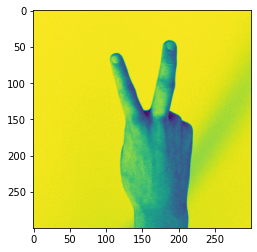

In [64]:
img=test_images[0].reshape(300,300)
plt.imshow(img)

In [67]:
## Lets see if the predicted result is correct or not

y_pred[0]

2

In [ ]:
## Since the Image is Scissor and the label to Represent Scissor is 2 hence Our predicted Result is Correct

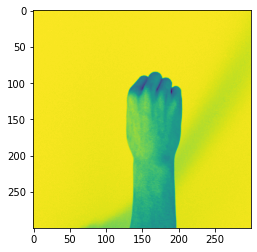

In [73]:
img=test_images[4].reshape(300,300)
plt.imshow(img)

In [72]:
y_pred[4]

0

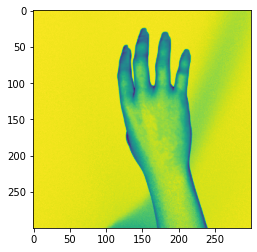

In [74]:
img=test_images[6].reshape(300,300)
plt.imshow(img)

In [75]:
y_pred[6]

2